In [1]:
print("hello world")

hello world


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2308/900850709.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("/Users/hj/Documents/무제/심화 프로젝트/train.csv", sep=',')
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [4]:
trade = pd.read_csv("/Users/hj/Documents/무제/심화 프로젝트/international_trade.csv", sep=',')
trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [6]:
df.describe()

,supply(kg),price(원/kg)
count,5.939700e+04,59397.000000
mean,1.189453e+04,1131.680674
std,5.226400e+04,2029.941445
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.800000e+03,1519.000000
max,1.222800e+06,20909.000000


In [7]:
df.groupby('item')['price(원/kg)'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,13707.0,910.196615,1422.148301,0.0,0.00,0.0,2032.50,8750.0
CB,7615.0,152.187131,345.053036,0.0,0.00,0.0,0.00,2500.0
CR,10661.0,273.118938,632.929933,0.0,0.00,0.0,0.00,3882.0
RD,12184.0,187.073539,358.150266,0.0,0.00,0.0,383.00,5715.0
TG,15230.0,3177.442022,2805.240092,0.0,992.25,2273.5,5532.75,20909.0


In [8]:
df['item'].value_counts()

# 감귤 > 브로콜리 > 무 > 당근 > 양배추 

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [9]:
df['corporation'].value_counts()

corporation
A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: count, dtype: int64

In [10]:
df['location'].value_counts()

location
J    35029
S    24368
Name: count, dtype: int64

In [11]:
df_cnt = df.groupby('item')['supply(kg)'].agg(['count', 'sum'])
df_cnt

,count,sum
item,,
BC,13707,1.370782e+07
CB,7615,8.560427e+07
CR,10661,5.388242e+07
RD,12184,3.371415e+08
TG,15230,2.161631e+08


In [12]:
type(df['timestamp'][0])

str

In [13]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [14]:
type(df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# timestamp : year / month / day 쪼개기

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [16]:
df['price(원/kg)'].value_counts()

price(원/kg)
0.0       35455
500.0        50
1000.0       45
550.0        42
400.0        41
          ...  
6234.0        1
5686.0        1
5818.0        1
5652.0        1
655.0         1
Name: count, Length: 7094, dtype: int64

<Axes: xlabel='item', ylabel='price(원/kg)'>

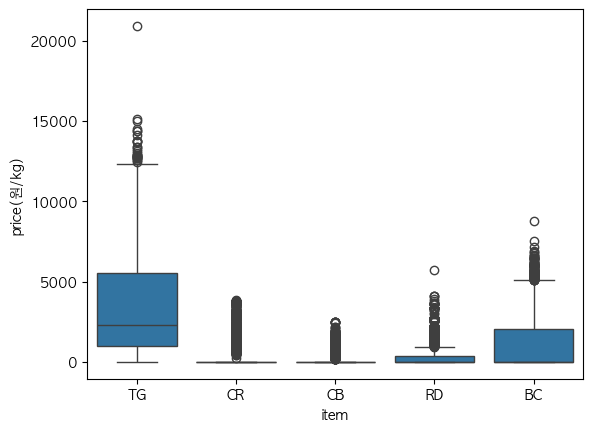

In [17]:
sns.boxplot(x='item', y='price(원/kg)', data=df)

<Axes: xlabel='item', ylabel='supply(kg)'>

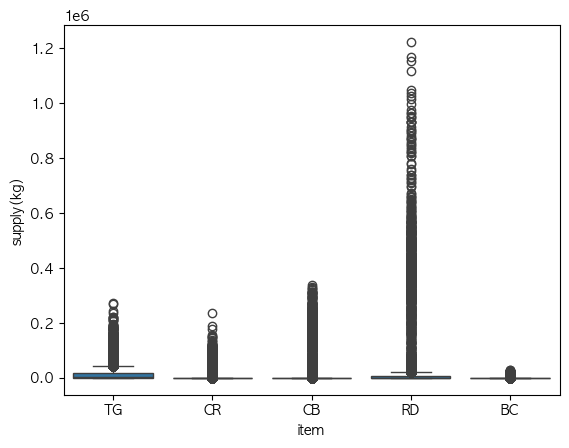

In [18]:
sns.boxplot(x='item', y='supply(kg)', data=df)

In [19]:
df[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [20]:
type(df['supply(kg)'][0])

numpy.float64

In [21]:
type(df['price(원/kg)'][0])

numpy.float64

In [22]:
# 법인별 아이템 평균 가격
df.groupby(['corporation', 'item'])['price(원/kg)'].mean()

corporation  item
A            BC      1315.576822
             CB       104.713395
             CR       622.192383
             RD       294.135588
             TG      3112.148063
B            BC       495.778398
             CR       173.214051
             TG      3279.455023
C            BC       474.738674
             CR       278.513460
             RD         5.846356
             TG      3788.332896
D            BC      1192.342088
             CB       106.405121
             CR       214.087328
             RD       181.058109
             TG      3056.239002
E            BC      1213.619829
             CB       186.241628
             CR       204.869009
             RD       140.486540
             TG      2651.035128
F            CB       258.862114
             RD       259.381484
Name: price(원/kg), dtype: float64

In [23]:
rd_df = df[df['item'] == 'RD']
rd_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
31983,RD_A_J_20190101,2019-01-01,RD,A,J,0.0,0.0,2019,1,1
31984,RD_A_J_20190102,2019-01-02,RD,A,J,0.0,0.0,2019,1,2
31985,RD_A_J_20190103,2019-01-03,RD,A,J,37060.0,367.0,2019,1,3
31986,RD_A_J_20190104,2019-01-04,RD,A,J,19260.0,460.0,2019,1,4
31987,RD_A_J_20190105,2019-01-05,RD,A,J,32140.0,402.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [24]:
df_nonzero = df[df['price(원/kg)'] != 0]
df_nonzero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [25]:
zero_supply_count = (df['supply(kg)']==0).sum()
print(zero_supply_count)

print("0인 행들의 비율 : ", (35452/59397)*100 )

35452
0인 행들의 비율 :  59.68651615401451


In [26]:
df_nonzero.groupby('item')['price(원/kg)'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,4525.0,2757.141436,1016.862765,205.0,2050.00,2518.0,3321.00,8750.0
CB,1620.0,715.373457,395.976956,162.0,396.75,619.0,975.25,2500.0
CR,2082.0,1398.521134,690.966629,250.0,923.25,1159.0,1699.25,3882.0
RD,4040.0,564.184158,417.250968,50.0,385.00,468.0,578.25,5715.0
TG,11675.0,4144.962912,2501.018590,551.0,1802.50,3847.0,6037.00,20909.0


In [27]:
df_nonzero.groupby('item')['supply(kg)'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,4525.0,3029.353238,3559.594885,8.0,520.0,1608.0,4448.0,30304.0
CB,1620.0,52842.092901,79690.482852,10.0,3152.0,10140.0,68334.0,337122.0
CR,2082.0,25880.125360,25893.653154,20.0,5900.0,17920.0,39165.0,236600.0
RD,4040.0,83450.869950,166457.257765,32.0,8560.0,16660.0,36290.0,1222800.0
TG,11675.0,18515.022701,27613.959225,6.0,1368.0,5985.0,24966.9,271156.0


In [28]:
df_nonzero['item'].value_counts()

item
TG    11675
BC     4525
RD     4040
CR     2082
CB     1620
Name: count, dtype: int64

In [29]:
df_nonzero.groupby('item')['supply(kg)'].sum()

item
BC    1.370782e+07
CB    8.560419e+07
CR    5.388242e+07
RD    3.371415e+08
TG    2.161629e+08
Name: supply(kg), dtype: float64

<Axes: xlabel='item', ylabel='price(원/kg)'>

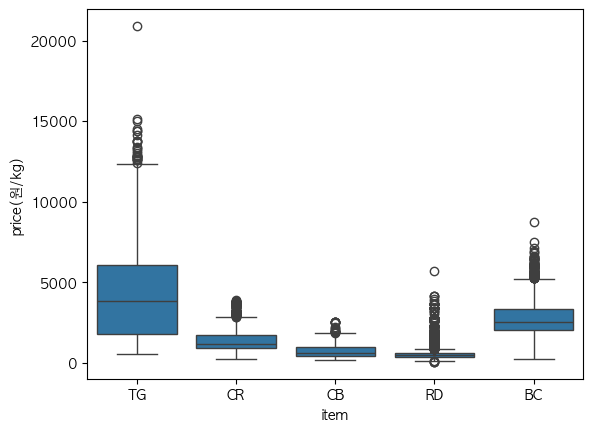

In [30]:
sns.boxplot(x='item', y='price(원/kg)', data=df_nonzero)

<Axes: xlabel='item', ylabel='supply(kg)'>

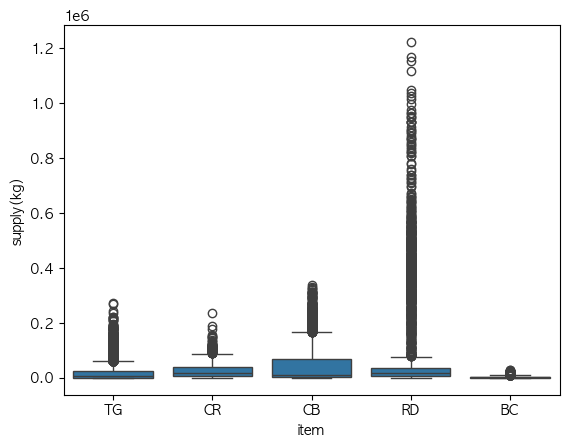

In [31]:
sns.boxplot(x='item', y='supply(kg)', data=df_nonzero)

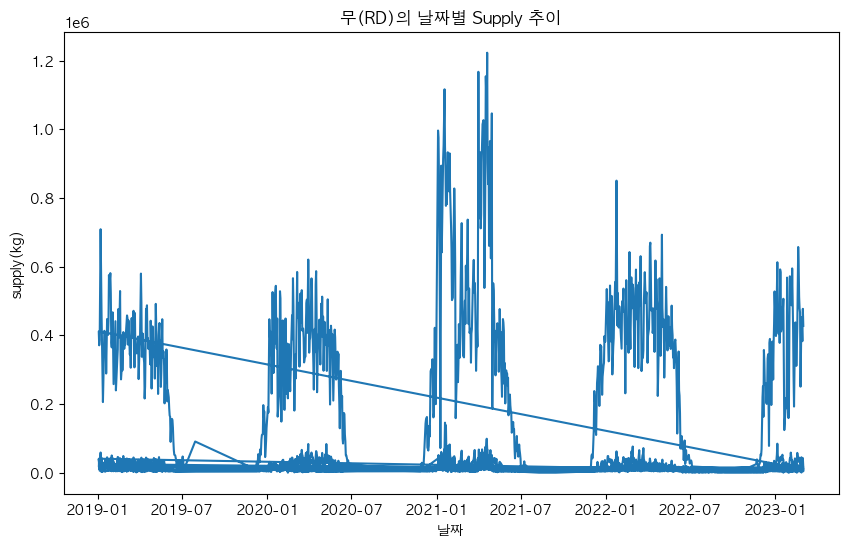

In [32]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
plt.plot(rd_supply_data['timestamp'], rd_supply_data['supply(kg)'])
plt.title("무(RD)의 날짜별 Supply 추이")
plt.xlabel("날짜")
plt.ylabel("supply(kg)")
plt.show()

# 그래프 아래 지그재그랑 일자로 그어진 그래프는 뭐지?

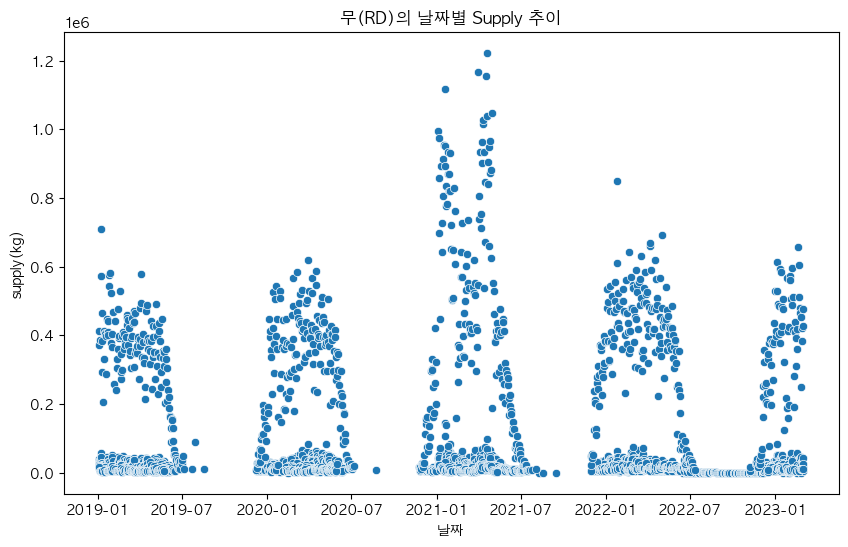

In [33]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
sns.scatterplot(x='timestamp', y='supply(kg)', data=rd_supply_data)
plt.title("무(RD)의 날짜별 Supply 추이")
plt.xlabel("날짜")
plt.ylabel("supply(kg)")
plt.show()

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]),
 [Text(-200000.0, 0, '-0.2'),
  Text(0.0, 0, '0.0'),
  Text(200000.0, 0, '0.2'),
  Text(400000.0, 0, '0.4'),
  Text(600000.0, 0, '0.6'),
  Text(800000.0, 0, '0.8'),
  Text(1000000.0, 0, '1.0'),
  Text(1200000.0, 0, '1.2'),
  Text(1400000.0, 0, '1.4')])

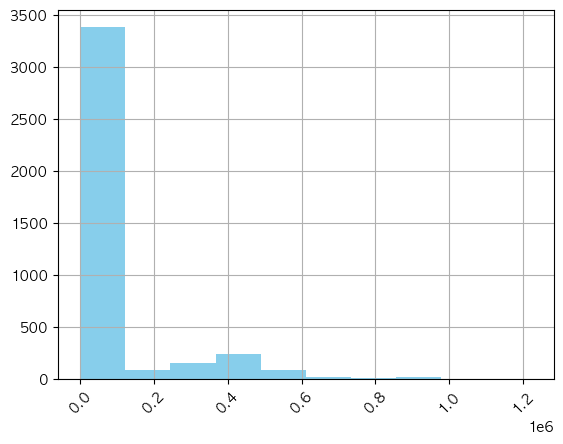

In [34]:
rd_supply_data_timestamp = rd_supply_data['supply(kg)']

rd_supply_data_timestamp.hist(bins=10, color="skyblue")
plt.xticks(rotation=45)


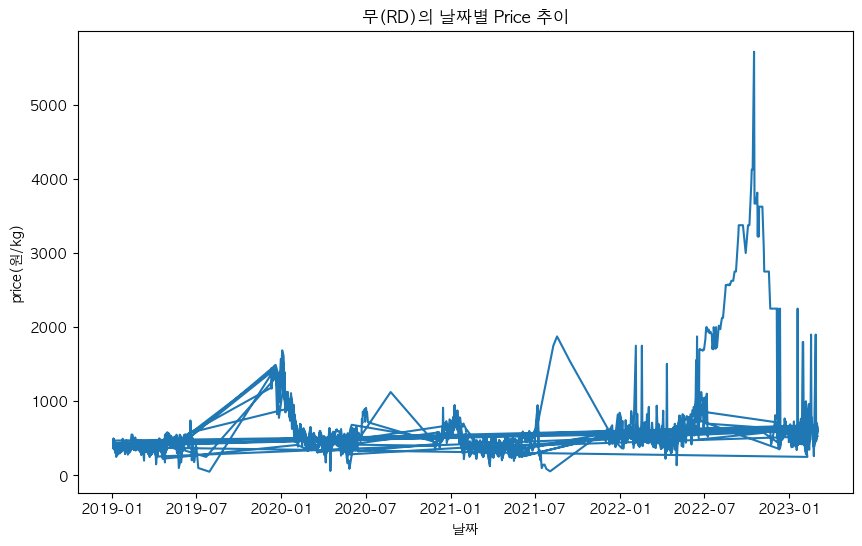

In [35]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
plt.plot(rd_supply_data['timestamp'], rd_supply_data['price(원/kg)'])
plt.title("무(RD)의 날짜별 Price 추이")
plt.xlabel("날짜")
plt.ylabel("price(원/kg)")
plt.show()

# 2022-07~2023-01 사이 가격 이상함

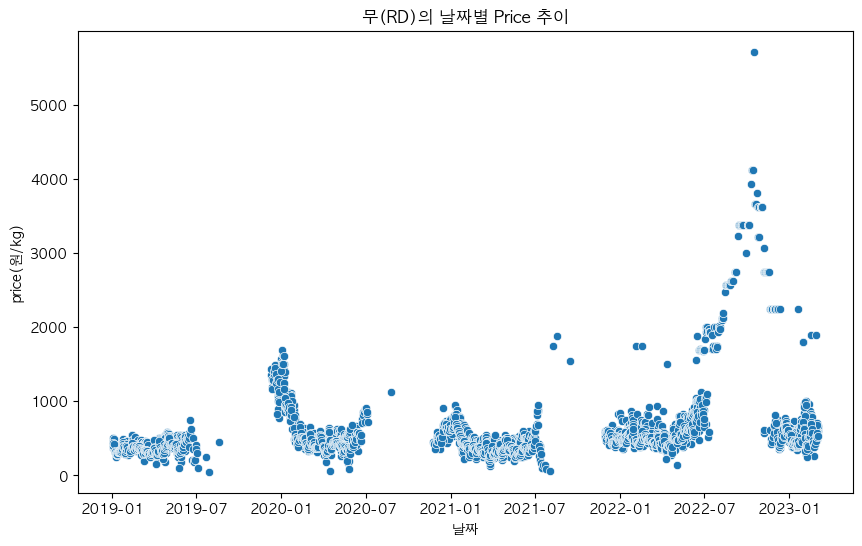

In [36]:
rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
plt.figure(figsize=(10,6))
sns.scatterplot(x='timestamp', y='price(원/kg)', data=rd_supply_data)
plt.title("무(RD)의 날짜별 Price 추이")
plt.xlabel("날짜")
plt.ylabel("price(원/kg)")
plt.show()

# 2022-07~2023-01 사이 가격 이상함

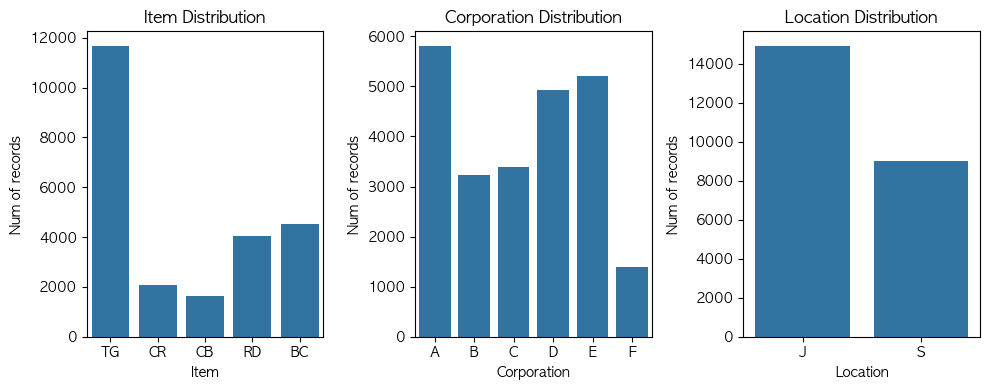

In [37]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 3,  1)
sns.countplot(x='item', data=df_nonzero)
plt.title('Item Distribution')
plt.xlabel('Item')
plt.ylabel('Num of records')

plt.subplot(1, 3,  2)
sns.countplot(x='corporation', data=df_nonzero)
plt.title('Corporation Distribution')
plt.xlabel('Corporation')
plt.ylabel('Num of records')

plt.subplot(1, 3,  3)
sns.countplot(x='location', data=df_nonzero)
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Num of records')

plt.tight_layout()
plt.show()

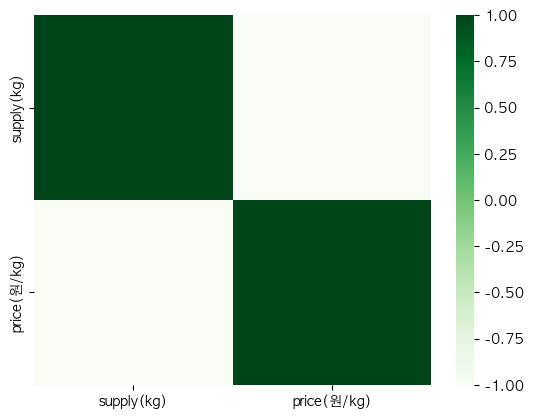

In [38]:
numeric_columns = df_nonzero.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_nonzero[numeric_columns].corr()

sns.heatmap(correlation_matrix.corr(), cmap='Greens')
plt.show()

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2308/39897356.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rd_supply_data, x='year', y='price(원/kg)',ax=axes[0], palette="Set2")
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2308/39897356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rd_supply_data, x='month', y='price(원/kg)',ax=axes[1], palette="Set2")


<Axes: xlabel='month', ylabel='price(원/kg)'>

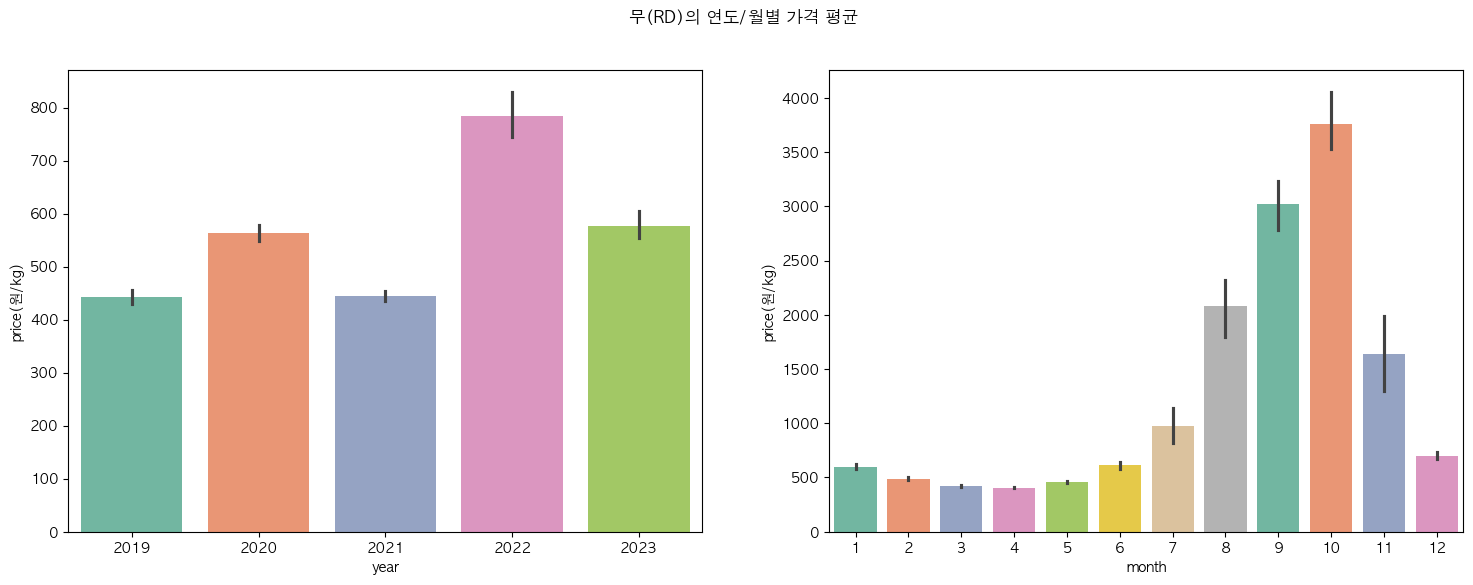

In [56]:
# 무의 연도별 price, 
fig, axes = plt.subplots(1,2, figsize=(18,6))
fig.suptitle('무(RD)의 연도/월별 가격 평균')
sns.barplot(data=rd_supply_data, x='year', y='price(원/kg)',ax=axes[0], palette="Set2")
sns.barplot(data=rd_supply_data, x='month', y='price(원/kg)',ax=axes[1], palette="Set2")

In [49]:
rd_supply_data.groupby('year')['price(원/kg)'].mean()

year
2019    442.308021
2020    562.649764
2021    444.356021
2022    784.729045
2023    576.547101
Name: price(원/kg), dtype: float64

Text(0.5, 1.0, '유통법인에 따른 무(RD) 가격')

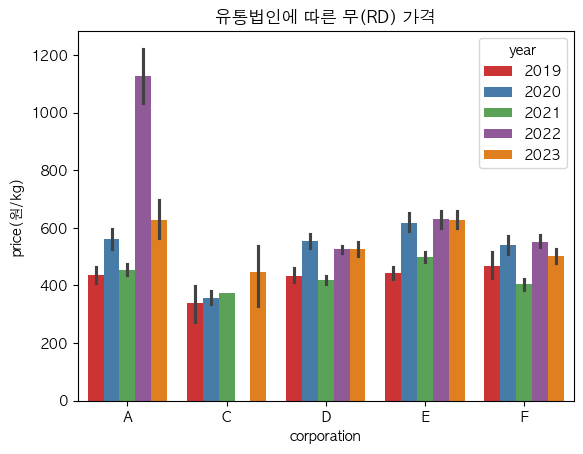

In [65]:
sns.barplot(x='corporation', y='price(원/kg)', hue='year', data=rd_supply_data, palette='Set1')
plt.title("유통법인에 따른 무(RD) 가격")

Text(0.5, 1.0, '지역에 따른 무(RD) 가격')

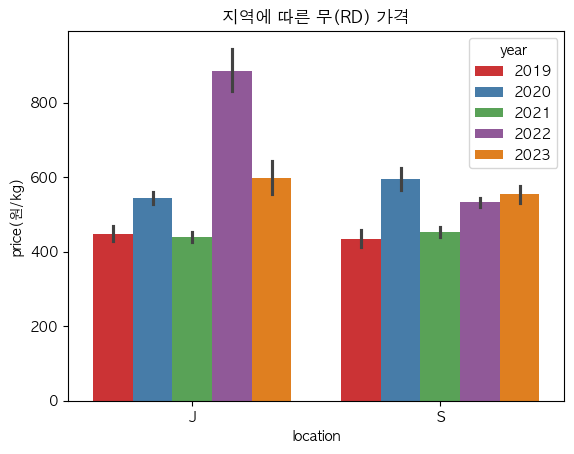

In [66]:
sns.barplot(x='location', y='price(원/kg)', hue='year', data=rd_supply_data, palette='Set1')
plt.title("지역에 따른 무(RD) 가격")